In [ ]:
import os

import torch

from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image

import matplotlib.pyplot as plt
import pandas as pd

### Loading a dataset

In [7]:
training_data = datasets.FashionMNIST(
    root='data', # path were data is stored
    train=True, # specifies train or test dataset
    download=True, # get from internet if not in root
    transform=ToTensor() # feature and label transformations
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


### Iterating and visualizing

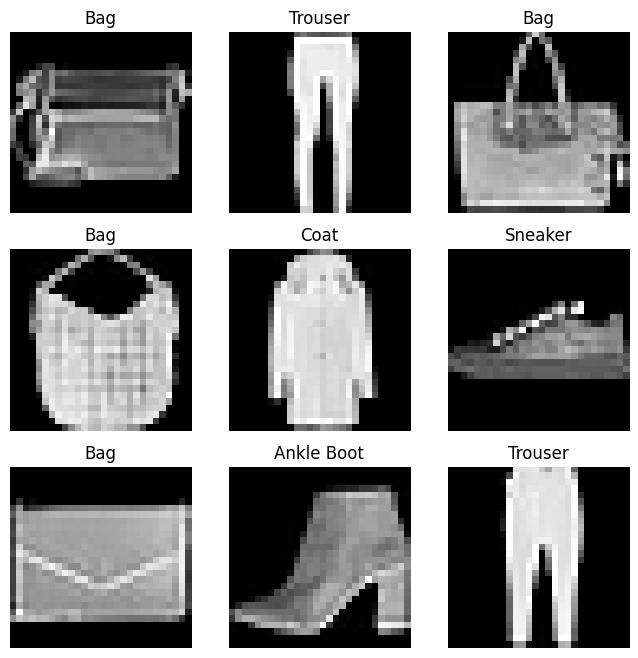

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()

### Create a custom dataset

A custom dataset must implement three functions:

- `__init__`
- `__len__`
- `__getitem__`

In [38]:
class CustomImageDataset(Dataset):
    def __init__(self, labels_file, img_dir, transform=None, target_transform=None):
        '''
        The init function is run once when instantiating the Dataset object.

        The labels.csv file looks like:
          tshirt1.jpg, 0
          tshirt2.jpg, 0
          ...
          ankleboot999.jpg, 9
        '''
        self.img_labels = pd.read_csv(labels_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        '''
        Returns the number of samples in our dataset.
        '''
        return len(self.img_labels)

    def __getitem__(self, idx):
        '''
        Returns a sample (image, label) from the dataset given an index.
        '''
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        if self.label_transform:
            label = self.target_transform(label)

        return image, label

### Preparing data for training with DataLoaders

`DataLoader` is an iterable that abstracts data sampling:

In [28]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Let's iterate:

torch.Size([64, 1, 28, 28])
torch.Size([64])


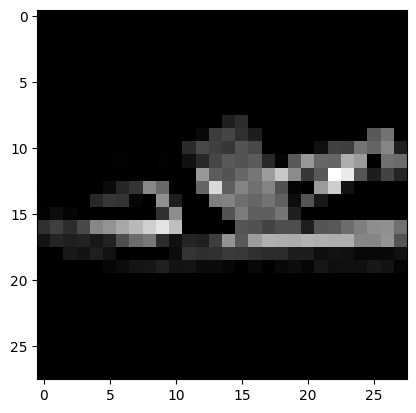

Class: Sandal


In [37]:
train_features, train_labels = next(iter(train_dataloader))

print(train_features.size())
print(train_labels.size())

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap='gray')
plt.show()
print('Class:', labels_map[label.item()])